# Homework 3: Univariate Statistics

In [1]:
MY_UNIQNAME = 'kaikang'

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

## Download the data from: 

* [https://www.kaggle.com/mylesoneill/world-university-rankings](https://www.kaggle.com/mylesoneill/world-university-rankings)

There are three rankings of universities included in the dataset: Center for World University Rankings (*CWUR*), Times Higher Education World University Rankings (*Times*), and Academic Ranking of World Universities (ARWU, or *Shanghai*).

Look at the column descriptions on the Kaggle page. Note that for some columns, there may be some missing values or values that may need some munging in order for your analysis to succeed. **Be sure to look at the values in the columns you work with using `describe()`**—if data are missing or nonsensical, this may suggest that you need to take extra steps to read them in properly.

## Answer the questions below. 
- Write your Python code that can answer the following questions, and
- Explain your answers in plain English. 

### Q1. For 20 Points: Compare the distributions of the scores across the three rankings

* Plot histograms and boxplots (or any other plots that you think to be helpful) for the overall scores for the CWUR, Times, and Shanghai rankings. What can you say about them?

In [2]:
# put your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
cwur = pd.read_csv('cwurData.csv', thousands=r',')
times = pd.read_csv('timesData.csv', thousands=r',')
shanghai = pd.read_csv('shanghaiData.csv', thousands=r',')



(array([ 40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 8 Text xticklabel objects>)

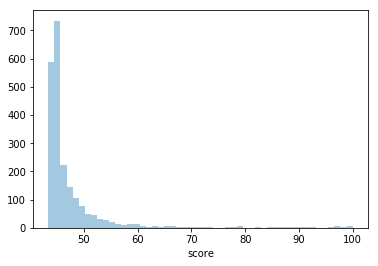

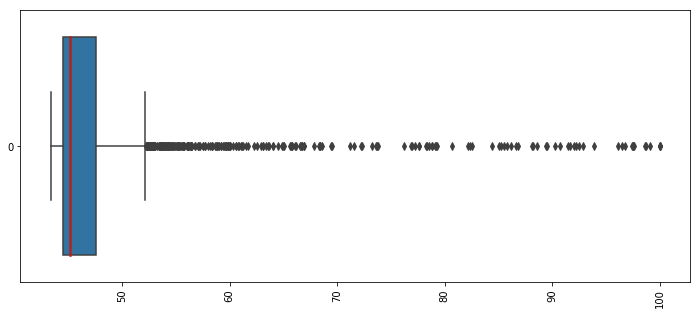

In [39]:
#plots for CWUR 
sns.distplot(cwur['score'], kde=False); 
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
medianprops = dict( linewidth=2.5, color='firebrick')
sns.boxplot(medianprops=medianprops,data=cwur['score'],orient='h')
plt.xticks(rotation=90)

In [4]:
times_score = np.array(times['total_score'])
for s in range(len(times_score)):
    if times_score[s] == '-': 
        times_score[s] = None
times_score = times_score.astype(float)
times['total_score'] = times_score

(array([ 30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 8 Text xticklabel objects>)

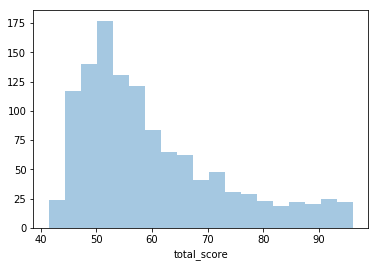

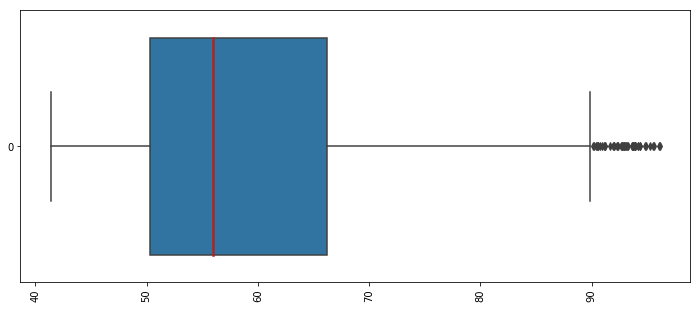

In [5]:
#plots for Times 
sns.distplot(times['total_score'][times['total_score']>0], kde=False); 
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
medianprops = dict( linewidth=2.5, color='firebrick')
sns.boxplot(medianprops=medianprops,data=times['total_score'],orient='h')
plt.xticks(rotation=90)

In [6]:
shanghai_score = shanghai['total_score'].astype(float)
shanghai_score = shanghai_score.astype(float)
shanghai.total_score = shanghai_score
type(shanghai.total_score[3])

numpy.float64

(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 11 Text xticklabel objects>)

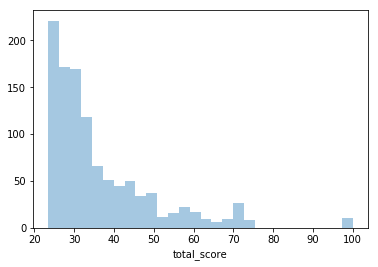

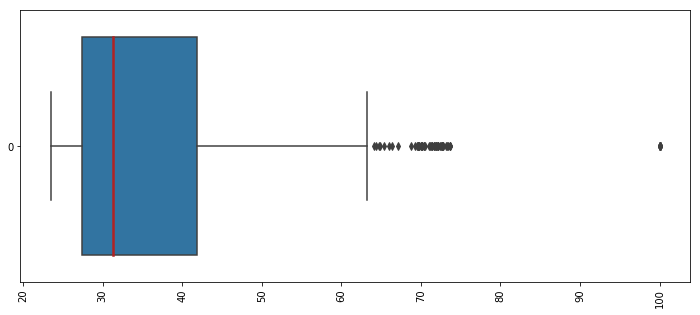

In [7]:
#plots for Shanghai
sns.distplot(shanghai['total_score'][shanghai['total_score']>0], kde=False); 
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
medianprops = dict( linewidth=2.5, color='firebrick')
sns.boxplot(medianprops=medianprops,data=shanghai['total_score'],orient='h')
plt.xticks(rotation=90)

From the histograms, the distributions of three datasets are right skewed, while the proportion of lower score in CWUR ranking data higher than the rest two because both Times and Shanghai has data without score which I excluded rather than assigning zero before plotting. From the boxplots, the interquartile range of Times is the largest, as well as its median score. Again, it's partially because some universities without overall score were filtered out. All of the three has extreme sample whose score reaches 100. Shanghai ranking has relatively more lower score samples (less than 40)

In [8]:
def multiplePlots(series):
    
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)
    
   # Histogram
    sns.distplot(series, ax=axs[0,0])

   # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current,lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")

   # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(xr,qntls, ax=axs[1,0])

   # Run sequence
    ax = sns.regplot(np.arange(len(series)),series, ax=axs[1,1])
    ax.set_ylabel("val")
    ax.set_xlabel("i")

### Q2. For 10 Points: Using the Times data, look at the number of students (`num_students` column) for all universities in 2016.

* Plot the distribution using the `multiplePlots` function from class. What does it look like?
* Compare the mean and median. Are they similar or different, and why?
* Which school has the most students?

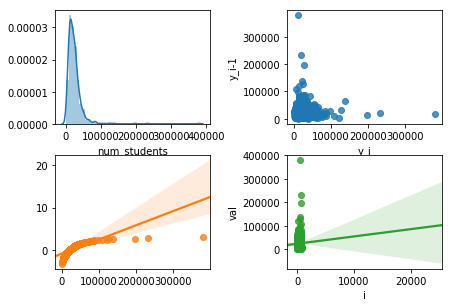

In [9]:
# put your code here
times2016 = times[times['year'] == 2016]
#exclude the NaN sample
times2016_stu = times2016['num_students']\
[times2016['num_students'] > 0].astype(int)
multiplePlots(times2016_stu)

In [10]:
np.mean(times2016_stu)

24161.264817150062

In [11]:
np.median(times2016_stu)

20174.0

In [12]:
times2016[times2016['num_students'] == np.max(times2016_stu)]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2413,601-800,Anadolu University,Turkey,12.2,14.3,22.6,10.9,100.0,NaN,379231.0,162.6,1%,78 : 22,2016


By inspecting histogram, the distribution looks like a rightskewed distribution.
The mean value is 24161.3, the median is 20174, the mean is larger than median value. The reason is that there are extreme large samples which skewed the mean, while the median is not sensitive to extreme values. 
Anadolu University has the most students (379231)

### Q3. For 10 points: Using the Times data, compare the international outlook scores (`international` column) for universities in the US versus universities outside the US.

* Plot their distributions for 2011 and describe them. Identify their their mean and median.
* Repeat this for 2016. Has the result changed?

In [13]:
times

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,36186.0,16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,15060.0,11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,11751.0,4.4,20%,50 : 50,2011


In [14]:
# put your code here
times_us2011 = times[(times['year'] == 2011) & \
    (times['country'] == 'United States of America')]
times_us2011
times_nonUS2011 = times[(times['year'] == 2011) & \
    (times['country'] != 'United States of America')]
times_nonUS2011

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,11.6,34%,46 : 54,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,15060.0,11.7,51%,37 : 63,2011
14,15,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.5,93.7,87.8,83.1,-,83.4,18178.0,14.7,37%,31 : 69,2011
16,17,University of Toronto,Canada,75.8,-,87.9,82.2,-,82.0,66198.0,19.5,15%,NaN,2011
20,21,University of Hong Kong,Hong Kong,68.4,91.4,71.4,96.1,56.5,79.2,19835.0,17.6,38%,53 : 47,2011
21,22,University College London,United Kingdom,74.0,90.8,81.6,80.6,39.0,78.4,26607.0,10.7,46%,56 : 44,2011
25,26,University of Tokyo,Japan,87.7,18.4,91.9,58.1,-,75.6,26199.0,5.7,10%,NaN,2011
27,28,Pohang University of Science and Technology,South Korea,69.5,32.6,62.5,96.5,100.0,75.1,3055.0,10.1,4%,20 : 80,2011
29,30,University of British Columbia,Canada,65.1,93.3,74.8,80.3,42.6,73.8,50152.0,17.6,25%,54 : 46,2011


42.23055555555555
38.6


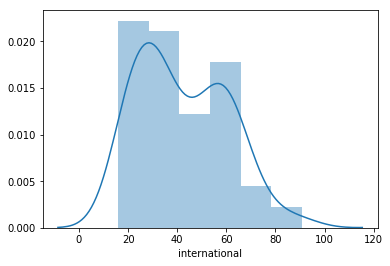

In [15]:
#2011 Universities in USA
times_outlook_us2011 = times_us2011['international'].astype(float)
sns.distplot(times_outlook_us2011)
print(np.mean(times_outlook_us2011))
print(np.median(times_outlook_us2011))

61.50252100840339
63.2


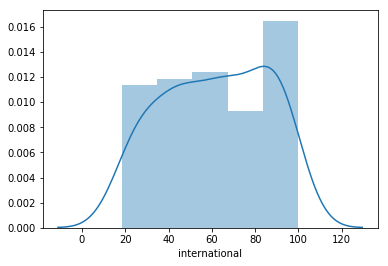

In [16]:
#2011 Universities not in USA
times_outlook_nonUS2011 = times_nonUS2011['international']\
[times_nonUS2011['international'] != '-'].astype(float)
sns.distplot(times_outlook_nonUS2011)
print(np.mean(times_outlook_nonUS2011))
print(np.median(times_outlook_nonUS2011))

In [17]:
times_us2016 = times[(times['year'] == 2016) & \
    (times['country'] == 'United States of America')]
times_us2016
times_nonUS2016 = times[(times['year'] == 2016) & \
    (times['country'] != 'United States of America')]
times_nonUS2016

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34%,46 : 54,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34%,46 : 54,2016
1810,8,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,89.1,15060.0,11.7,51%,37 : 63,2016
1811,9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,88.3,18178.0,14.7,37%,31 : 69,2016
1816,14,University College London,United Kingdom,78.1,94.4,91.0,94.2,40.5,87.1,26607.0,10.7,46%,56 : 44,2016
1821,19,University of Toronto,Canada,75.9,77.8,89.3,90.9,49.1,83.9,66198.0,19.5,15%,NaN,2016
1825,23,London School of Economics and Political Science,United Kingdom,69.8,93.6,80.6,94.3,32.2,81.3,NaN,NaN,NaN,NaN,2016
1826,24,University of Edinburgh,United Kingdom,68.6,89.8,77.2,96.3,36.1,80.3,25774.0,14.1,36%,58 : 42,2016
1828,26,National University of Singapore,Singapore,71.7,96.2,84.5,79.4,49.8,79.2,31592.0,15.5,34%,49 : 51,2016
1829,27,King’s College London,United Kingdom,64.5,93.8,75.8,93.8,40.1,78.2,21394.0,11.4,37%,61 : 39,2016


42.431506849315085
40.2


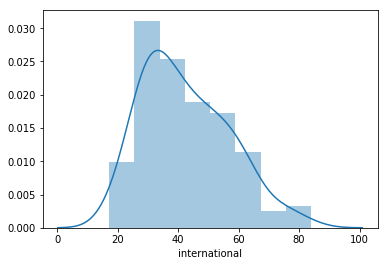

In [18]:
#2016 Universities in USA
times_outlook_us2016 = times_us2016['international'].astype(float)
sns.distplot(times_outlook_us2016)
print(np.mean(times_outlook_us2016))
print(np.median(times_outlook_us2016))

49.855198776758414
63.2


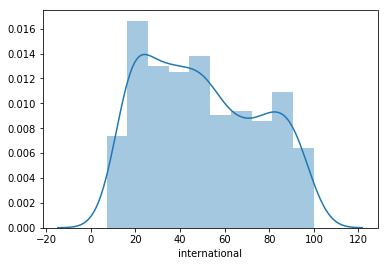

In [19]:
#2016 Universities not in USA
times_outlook_nonUS2016 = times_nonUS2016['international']\
[times_nonUS2016['international'] != '-'].astype(float)
sns.distplot(times_outlook_nonUS2016)
print(np.mean(times_outlook_nonUS2016))
print(np.median(times_outlook_nonUS2011))

In 2011, for universities in USA, the distribution has two peaks, the mean and median outlook score are 42.2 and 38.6. For universities outside of USA, the distribution is close to universal distribution, the mean and median outlook score are 61.5 and 63.2 which are higher than universities in USA. 

In 2016, for universities in USA, the distribution has one peak and slightly rightskewed with mean 42.4 and median 40.2. For universities outside of USA, the distribution is like rightskewed trapzoid with mean 49.9 and median 63.2. Comparing 2016 with 2011, the mean outlook score for universities outside of USA has dropped but the median remains stable. For USA universities, the changes of mean and median are not evident. Overall, the outlook score of universities outside of USA is higher than the ones inside of USA.

### Q4. For 10 Points: Using the data for the CWUR rankings, investigate how the rankings change over time.

* Which universities consistently appear in the rankings, and which aren't?
* Which universities are rising, falling, or stationary in rank over the years?
* Plot the results, and explain your answers

It might be more intuitive to compare the scores rather than the ranks directly. Feel free to do this if it's the case.

In [20]:
# put your code here
cwur_rank = cwur[['world_rank','institution','year']].copy()
#cwur.groupby('institution')
cwur_rank.groupby(['institution']).agg(['count'])

,world_rank,year
,count,count
institution,,
AGH University of Science and Technology,2,2
Aalborg University,2,2
Aalto University,2,2
Aarhus University,2,2
Aberystwyth University,2,2
Adam Mickiewicz University in Poznań,2,2
Ain Shams University,2,2
Aix-Marseille University,2,2


In [21]:
# num_lst is the list of universities which consistently appear in the rankings among 
num_lst = cwur_rank.institution.value_counts()[cwur_rank.\
    institution.value_counts()==4]
num_lst.size

91

In [22]:
rank = cwur_rank.pivot(index='institution', columns='year',values='world_rank')
rank.head(10)

year,2012,2013,2014,2015
institution,,,,
AGH University of Science and Technology,NaN,NaN,653.0,782.0
Aalborg University,NaN,NaN,593.0,565.0
Aalto University,NaN,NaN,392.0,421.0
Aarhus University,NaN,NaN,119.0,122.0
Aberystwyth University,NaN,NaN,800.0,814.0
Adam Mickiewicz University in Poznań,NaN,NaN,878.0,890.0
Ain Shams University,NaN,NaN,965.0,965.0
Aix-Marseille University,NaN,NaN,224.0,206.0
Ajou University,NaN,NaN,447.0,433.0


In [23]:
goodUniversity = rank[(rank[2012] > 0) & (rank[2013] > 0) &\
    (rank[2014] > 0) & (rank[2015] > 0)].index.unique()
goodUniversity.size

91

In [24]:
print(rank[rank[2015] < rank[2012]].index.unique().size)
rank[rank[2015] < rank[2012]].head()

35


year,2012,2013,2014,2015
institution,,,,
Columbia University,9.0,6.0,6.0,6.0
Cornell University,12.0,13.0,11.0,10.0
Dartmouth College,58.0,82.0,44.0,44.0
Georgia Institute of Technology,87.0,100.0,83.0,80.0
Ludwig Maximilian University of Munich,83.0,67.0,82.0,79.0


In [25]:
print(rank[rank[2015] > rank[2012]].index.unique().size)
rank[rank[2015] > rank[2012]].head()

58


year,2012,2013,2014,2015
institution,,,,
Arizona State University,80.0,73.0,106.0,97.0
Boston University,62.0,54.0,67.0,66.0
Brown University,66.0,77.0,81.0,83.0
California Institute of Technology,5.0,11.0,12.0,12.0
Carnegie Mellon University,43.0,51.0,54.0,61.0


In [26]:
print(rank[rank[2015] == rank[2012]].index.unique().size)
rank[rank[2015] == rank[2012]]

6


year,2012,2013,2014,2015
institution,,,,
Harvard University,1.0,1.0,1.0,1.0
Kyoto University,17.0,15.0,16.0,17.0
Pierre-and-Marie-Curie University,63.0,48.0,68.0,63.0
University of Cambridge,4.0,5.0,4.0,4.0
University of Texas at Austin,30.0,26.0,29.0,30.0
University of Wisconsin–Madison,25.0,23.0,25.0,25.0


In [27]:
cwur[cwur.world_rank==800]
cwur[cwur.year==2014]


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
205,6,Columbia University,USA,4,13,8,9,14,13,9,13.0,4,97.41,2014
206,7,"University of California, Berkeley",USA,5,4,22,6,7,4,3,7.0,28,92.84,2014
207,8,University of Chicago,USA,6,10,14,8,17,19,10,18.0,149,92.03,2014
208,9,Princeton University,USA,7,5,16,3,70,25,19,41.0,204,88.56,2014
209,10,Yale University,USA,8,9,25,11,18,7,32,19.0,45,88.11,2014


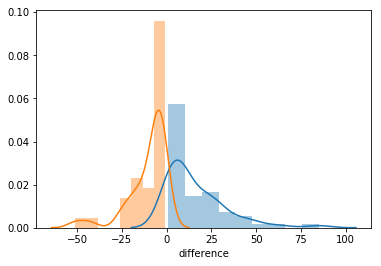

In [28]:
rank['difference'] = rank[2015] - rank[2012]
fall = rank[rank['difference'] > 0].difference
rise = rank[rank['difference'] < 0].difference
sns.distplot(fall)
sns.distplot(rise)

There're 91 universities consistently appeared in the rankings (e.g University of Minnesota, Twin Cities; Purdue University, West Lafayette; Boston University...), it's seems like the number of universities being ranked is different among years. 

Take 2012 to 2015 as the range of overall comparing. There are 35 universities (e.g Columbia University and Cornell University) whose rank is rising, there are 58 universities (e.g Boston University and Carnegie Mellon University) whose rank is falling, and there are 6 universities (e.g Harvard University and Kyoto University
) whose rank remained unchanged (stationary) between rankings of 2012 and 2015.

The plot is the histogram of the differences of ranking (between 2015 and 2012) of all the rising samples and falling samples in the range of three years.

### Q5. For 15 Points: Using the education expenditure data, identify the nations that spent below the average of the OECD for Higher Education Institutions in 1995, but above the average in 2010.

* Sort the nations by difference between 1995 and 2010
* Plot the lag, and explain your answers.

In [29]:
# put your code here
edu = pd.read_csv('education_expenditure_supplementary_data.csv',\
    lineterminator='\r')
edu_high = edu[edu['institute_type'] == 'Higher Education Institutions ']
mean95 = np.mean(edu_high['1995'])
mean10 = np.mean(edu_high['2010'])
print(mean95)
print(mean10)
nations = edu_high[(edu_high['1995'] < mean95) & (edu_high['2010'] > mean10)]
nations

0.9322580645161294
1.1212121212121213


,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
76,Austria,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.5,1.4
77,Belgium,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.4,1.3
89,Ireland,Higher Education Institutions,Public,0.9,1.2,1.0,1.4,1.3,1.2


In [30]:
# This block is selecting the country whose spent for all institutions below the average
# of OECD for Higher Education Institutions in 1995 but above in 2010
# There aren't any such countries
edu[(edu['institute_type'] == 'All Institutions') & \
    (edu['1995'] < mean95) & (edu['2010'] > mean10)]

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011


In [31]:
#create a new column: difference
edu['difference'] = edu['2010'] - edu['1995']
edu

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011,difference
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3,0.5
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3,0.1
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5,0.3
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4,1.4
4,Canada,All Institutions,Public,5.8,5.2,4.8,5.0,5.2,NaN,-0.6
5,Chile,All Institutions,Public,NaN,4.2,3.3,4.1,4.3,3.9,NaN
6,Czech Republic,All Institutions,Public,4.8,4.2,4.1,4.2,4.1,4.4,-0.7
7,Denmark,All Institutions,Public,6.5,6.4,6.8,7.5,7.6,7.5,1.1
8,Estonia,All Institutions,Public,NaN,NaN,4.7,5.9,5.6,5.2,NaN
9,Finland,All Institutions,Public,6.6,5.5,5.9,6.3,6.4,6.3,-0.2


In [32]:
#sort and copy the dataframe 
edu_sorted = edu.sort_values('difference')
diff = edu_sorted['difference']


Text(0.5, 0, 'y_i')

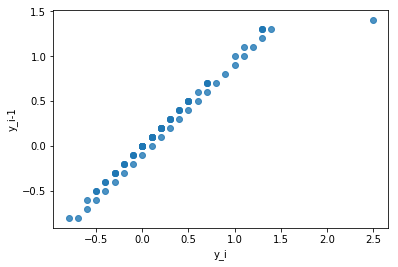

In [33]:
lag = diff.copy()
lag = np.array(lag[:-1])
current = diff[1:]
ax = sns.regplot(current,lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

There are no countries whose expenditure on All Institutions is below the OECD's average expenditure on Higher Education Institutions in 1995 and above in 2010.

But Austria, Belgium and Ireland's expenditure on Higher Education Institutions is below the OECD's average expenditure on Higher Education Institutions in 1995 and above the in 2010.

I created a new dataframe called edu_high using data with institute_type: Higher Education Institutions. Then calculate the mean expenditure in 1995 and 2010, then selected the nations spent below average expenditure in 1995 but above average in 2010.

The lag plot of nations difference between 1995 and 2010 is linear, which is attributed to the sorted dataframe which has no randomness. 


### Q6. For 15 Points: Using the Times ranking, look at how the Female : Male ratio (`female_male_ratio` column) changes over time.

What were the distributions like in the year 2012 and 2015? How have these distributions changed?

You may want to convert the column values to an easier-to-understand measure, such as a percentage or the ratio of female students (the first numeric value in the ratio entry).

In [34]:
times.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27%,45 : 55,2011


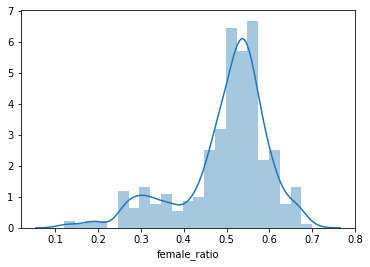

In [35]:
# put your code here
#times['perct_female'] = times['female_male_ratio'].str.split(":")[0] / times['female_male_ratio'].str.split(":")[1]
perct = []
for i in times['female_male_ratio'].str.split(":"):
    if type(i) is list and len(i) == 2:
        perct.append(int(i[0]) / (int(i[0]) + int(i[1])))
    else: perct.append(None)
times['female_ratio'] = np.array(perct)
times2012 = times[(times['year'] == 2012) & (times['female_ratio'] > 0)]
times2015 = times[(times['year'] == 2015) & (times['female_ratio'] > 0)]
perct2012 = times2012['female_ratio'].astype(float)
perct2015 = times2015['female_ratio'].astype(float)
sns.distplot(perct2012)


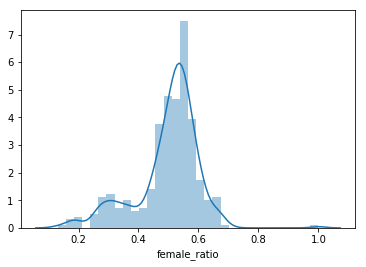

In [36]:
sns.distplot(perct2015)
#times2015

I converted the female_male_ratio to female_ratio and pop it into a new column of times dataframe. Then I picked out the 2012 and 2015 datasets, after that, filtered out the record without female_ratio value before plotting the histograms.

The distribution for 2012 is like leftskewed normal distribution, however, the left tail has a small peak around 0.3 (30% female). The distribution for 2015 has more samples at higher female ratio (arround 1.0), another difference is the major crest is higher than 2012 due to more samples with ratio 0.5-0.6. 

### *Bonus* – For 5 Points: Which, if any, of the rankings from the Kaggle data set support the claims made in [this Times Higher Education article on public schools](https://www.timeshighereducation.com/student/best-universities/best-public-universities-united-states)?

Justify your claim with specific examples or data.

In [37]:
cwurUC = cwur[(cwur['institution'] == 'University of California, Berkeley') | \
    (cwur['institution'] == 'University of California, Davis') | \
    (cwur['institution'] == 'University of California, Irvine') | \
    (cwur['institution'] == 'University of California, Los Angeles') | \
    (cwur['institution'] == 'University of California, Merced') | \
    (cwur['institution'] == 'University of California, Riverside') | \
    (cwur['institution'] == 'University of California, San Diego') | \
    (cwur['institution'] == 'University of California, San Francisco') | \
    (cwur['institution'] == 'University of California, Santa Barbara') | \
    (cwur['institution'] == 'University of California, Santa Cruz')]

UC_rank = cwurUC[['institution','national_rank']].copy()
UC_rank_grouped = UC_rank.groupby('institution').mean()
UC_rank_grouped

,national_rank
institution,
"University of California, Berkeley",5.75
"University of California, Davis",35.50
"University of California, Irvine",45.00
"University of California, Los Angeles",12.25
"University of California, Merced",228.50
"University of California, Riverside",90.00
"University of California, San Diego",15.00
"University of California, San Francisco",18.00
"University of California, Santa Barbara",33.25


In [38]:
UC_rank_grouped.sort_values('national_rank')

,national_rank
institution,
"University of California, Berkeley",5.75
"University of California, Los Angeles",12.25
"University of California, San Diego",15.00
"University of California, San Francisco",18.00
"University of California, Santa Barbara",33.25
"University of California, Davis",35.50
"University of California, Irvine",45.00
"University of California, Santa Cruz",71.00
"University of California, Riverside",90.00


From the above average rank among UC system according to CWUR ranking, in accordance with the given article, the top 2 UC school are UC Berkeley and UC Los Angeles.